In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
csv = 'csv/7_Harry_Potter_and_the_Deathly_Hallows_Part_1.csv'

# Clases y demás

## Encontrar las veces que se repite un personaje

### Una clase para ver cuántas líneas de diálogo tienen los 10 personajes más repetidos

In [4]:
class ContadorPersonajesRepetidos:
    def __init__(self, dataset_path):
        self.dataset = pd.read_csv(dataset_path)

    def contar_personajes_repetidos(self, num_personajes=10):
        # Contar la frecuencia de los personajes
        frecuencia_personajes = self.dataset['character'].value_counts()

        # Seleccionar los quince personajes más repetidos
        quince_personajes_mas_repetidos = frecuencia_personajes.head(num_personajes)

        # Crear un nuevo DataFrame con los quince personajes y sus repeticiones
        personajes_repetidos_15 = pd.DataFrame({'Personaje': quince_personajes_mas_repetidos.index, 'Repeticiones': quince_personajes_mas_repetidos.values})

        return personajes_repetidos_15

### Una clase para ver las veces que esos personajes son mencionados en los diálogos

In [5]:
class ContadorNombresEnDialogo:
    def __init__(self, dataset_path, palabras_a_buscar):
        self.dataset = pd.read_csv(dataset_path)
        self.palabras_a_buscar = [palabra.lower() for palabra in palabras_a_buscar]

    def contar_repeticiones(self):
        # Convertir el contenido de la columna "dialog" a minúsculas
        self.dataset['dialog'] = self.dataset['dialog'].str.lower()

        # Inicializar un diccionario para almacenar las repeticiones de cada palabra
        repeticiones = {palabra.capitalize(): [] for palabra in self.palabras_a_buscar}

        # Contar la frecuencia de cada palabra en todas las líneas de diálogo
        for palabra in self.palabras_a_buscar:
            repeticiones[palabra.capitalize()] = [len(re.findall(rf'\b{re.escape(palabra)}\b', dialog)) for dialog in self.dataset['dialog']]

        # Crear un DataFrame con los resultados
        resultado_df = pd.DataFrame({'Palabra': [palabra.capitalize() for palabra in self.palabras_a_buscar], 'Repeticiones': [sum(repeticiones[palabra.capitalize()]) for palabra in self.palabras_a_buscar]})
        
        # Calcular el sumatorio de repeticiones
        sumatorio_repeticiones = resultado_df['Repeticiones'].sum()

        # Agregar el sumatorio al DataFrame de resultados
        resultado_df = pd.concat([resultado_df, pd.DataFrame({'Palabra': ['Sumatorio'], 'Repeticiones': [sumatorio_repeticiones]})], ignore_index=True)

        return resultado_df

## Personajes más relevantes

In [6]:
if __name__ == "__main__":
    contador = ContadorPersonajesRepetidos(csv)
    resultados_personajes = contador.contar_personajes_repetidos()

resultados_personajes

,Personaje,Repeticiones
0,Harry Potter,282
1,Hermione Granger,221
2,Ron Weasley,167
3,Voldemort,26
4,Xenophilius Lovegood,25
5,Alastor Moody,18
6,Bellatrix Lestrange,15
7,Rufus Scrimgeour,14
8,Dobby,13
9,Scabior,13


### Formas de referirse a los personajes más relevantes

In [7]:
palabras_a_buscar_harry = ["harry potter", "harry", "the boy who lived", "the chosen one", "potter", "mr. potter", "the gryffindor seeker", "harry james potter"]
palabras_a_buscar_hermione = ["hermione granger", "hermione", "granger", "miss granger", "hermione jean granger", "the brightest witch of her age", "the smart one"]
palabras_a_buscar_ron = ["ron", "ron weasley", "ronald", "ronald weasley", "the ginger", "ronniekins", "ginger nut", "the weasley boy", "won-won"]
palabras_a_buscar_tom = ["tom marvolo riddle","tom riddle","voldemort","lord voldemort","the dark lord","riddle","the heir of slytherin","the young dark wizard","the memory"]
palabras_a_buscar_xenophilius = ["Xenophilius Lovegood","Xenophilius","Mr. Lovegood","Father of Luna","Xeno","The Quibbler Editor","Luna's Dad" ,"The Believer in Crumple-Horned Snorkacks"]
palabras_a_buscar_moody = ["Alastor Moody","Mad-Eye Moody","Moody","Alastor","The Eye","Mad-Eye"]
palabras_a_buscar_bellatrix = ["Bellatrix Lestrange","Bellatrix","Mrs. Lestrange","Lestrange","The Dark Witch","The Black Sister","The Fanatical Follower of Voldemort"]
palabras_a_buscar_scrimgeour = ["Rufus Scrimgeour","Minister Scrimgeour","Scrimgeour","Rufus","The Minister in Dark Times","The Minister with a Stance"]
palabras_a_buscar_dobby = ["Dobby","Master's Elf","Sir's Elf","Harry's Elf","The Sock Elf","House-Elf with a Knitted Hat"]
palabras_a_buscar_scabior = ["Scabior","The Snatcher","The Hunter of Muggle-borns","The Carroñero","The Dark Wizard Henchman"]

#### Harry Potter - 146 veces

In [9]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_harry
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_harry = contador.contar_repeticiones()

resultados_harry

,Palabra,Repeticiones
0,Harry potter,18
1,Harry,78
2,The boy who lived,0
3,The chosen one,2
4,Potter,37
5,Mr. potter,10
6,The gryffindor seeker,0
7,Harry james potter,1
8,Sumatorio,146


#### Hermione - 48 veces

In [10]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_hermione
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_hermione = contador.contar_repeticiones()

resultados_hermione

,Palabra,Repeticiones
0,Hermione granger,0
1,Hermione,40
2,Granger,5
3,Miss granger,2
4,Hermione jean granger,1
5,The brightest witch of her age,0
6,The smart one,0
7,Sumatorio,48


#### Ron - 29 veces

In [11]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_ron
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_ron = contador.contar_repeticiones()

resultados_ron

,Palabra,Repeticiones
0,Ron,27
1,Ron weasley,0
2,Ronald,2
3,Ronald weasley,0
4,The ginger,0
5,Ronniekins,0
6,Ginger nut,0
7,The weasley boy,0
8,Won-won,0
9,Sumatorio,29


#### Tom/Voldy - 16 veces

In [12]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_tom
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_tom = contador.contar_repeticiones()

resultados_tom

,Palabra,Repeticiones
0,Tom marvolo riddle,0
1,Tom riddle,3
2,Voldemort,5
3,Lord voldemort,0
4,The dark lord,3
5,Riddle,5
6,The heir of slytherin,0
7,The young dark wizard,0
8,The memory,0
9,Sumatorio,16


#### Xenophilius - 8 veces

In [13]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_xenophilius
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_xenophilius = contador.contar_repeticiones()

resultados_xenophilius

,Palabra,Repeticiones
0,Xenophilius lovegood,2
1,Xenophilius,2
2,Mr. lovegood,3
3,Father of luna,0
4,Xeno,0
5,The quibbler editor,0
6,Luna's dad,1
7,The believer in crumple-horned snorkacks,0
8,Sumatorio,8


#### Moody - 9 veces

In [14]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_moody
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_moody = contador.contar_repeticiones()

resultados_moody

,Palabra,Repeticiones
0,Alastor moody,0
1,Mad-eye moody,0
2,Moody,0
3,Alastor,0
4,The eye,0
5,Mad-eye,9
6,Sumatorio,9


#### Bellatrix - 1 vez

In [15]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_bellatrix
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_bellatrix = contador.contar_repeticiones()

resultados_bellatrix

,Palabra,Repeticiones
0,Bellatrix lestrange,0
1,Bellatrix,1
2,Mrs. lestrange,0
3,Lestrange,0
4,The dark witch,0
5,The black sister,0
6,The fanatical follower of voldemort,0
7,Sumatorio,1


#### Scrimgeour - 1 vez

In [16]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_scrimgeour
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_scrimgeour = contador.contar_repeticiones()

resultados_scrimgeour

,Palabra,Repeticiones
0,Rufus scrimgeour,0
1,Minister scrimgeour,0
2,Scrimgeour,1
3,Rufus,0
4,The minister in dark times,0
5,The minister with a stance,0
6,Sumatorio,1


#### Dobby 20 veces

In [18]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_dobby
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_dobby = contador.contar_repeticiones()

resultados_dobby

,Palabra,Repeticiones
0,Dobby,20
1,Master's elf,0
2,Sir's elf,0
3,Harry's elf,0
4,The sock elf,0
5,House-elf with a knitted hat,0
6,Sumatorio,20


#### Scabior 0 veces

In [19]:
if __name__ == "__main__":
    palabras_a_buscar = palabras_a_buscar_scabior
    contador = ContadorNombresEnDialogo(csv, palabras_a_buscar)
    resultados_scabior = contador.contar_repeticiones()

resultados_scabior

,Palabra,Repeticiones
0,Scabior,0
1,The snatcher,0
2,The hunter of muggle-borns,0
3,The carroñero,0
4,The dark wizard henchman,0
5,Sumatorio,0


### Continuación

#### Añadimos los resultados al dataframe original

In [20]:
resultados = [146, 48, 29, 16, 8, 9, 1, 1, 20, 0]

Añadimos columna

In [21]:
resultados_personajes['Menciones'] = resultados
resultados_personajes

,Personaje,Repeticiones,Menciones
0,Harry Potter,282,146
1,Hermione Granger,221,48
2,Ron Weasley,167,29
3,Voldemort,26,16
4,Xenophilius Lovegood,25,8
5,Alastor Moody,18,9
6,Bellatrix Lestrange,15,1
7,Rufus Scrimgeour,14,1
8,Dobby,13,20
9,Scabior,13,0


Sumamos las columnas

In [22]:
resultados_personajes['Total'] = resultados_personajes['Repeticiones'] + resultados_personajes['Menciones']
resultados_personajes

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,282,146,428
1,Hermione Granger,221,48,269
2,Ron Weasley,167,29,196
3,Voldemort,26,16,42
4,Xenophilius Lovegood,25,8,33
5,Alastor Moody,18,9,27
6,Bellatrix Lestrange,15,1,16
7,Rufus Scrimgeour,14,1,15
8,Dobby,13,20,33
9,Scabior,13,0,13


Re-ordenamos las columnas

In [23]:
resultados_personajes = resultados_personajes.sort_values(by='Total', ascending=False)
resultados_personajes = resultados_personajes.reset_index(drop=True)
resultados_personajes # podemos observar cambios en el orden

,Personaje,Repeticiones,Menciones,Total
0,Harry Potter,282,146,428
1,Hermione Granger,221,48,269
2,Ron Weasley,167,29,196
3,Voldemort,26,16,42
4,Xenophilius Lovegood,25,8,33
5,Dobby,13,20,33
6,Alastor Moody,18,9,27
7,Bellatrix Lestrange,15,1,16
8,Rufus Scrimgeour,14,1,15
9,Scabior,13,0,13


Filtramos solo por el total

In [25]:
resultados_personajes = resultados_personajes[['Personaje', 'Total']]
resultados_personajes

,Personaje,Total
0,Harry Potter,428
1,Hermione Granger,269
2,Ron Weasley,196
3,Voldemort,42
4,Xenophilius Lovegood,33
5,Dobby,33
6,Alastor Moody,27
7,Bellatrix Lestrange,16
8,Rufus Scrimgeour,15
9,Scabior,13


Vamos a hacer una gráfica

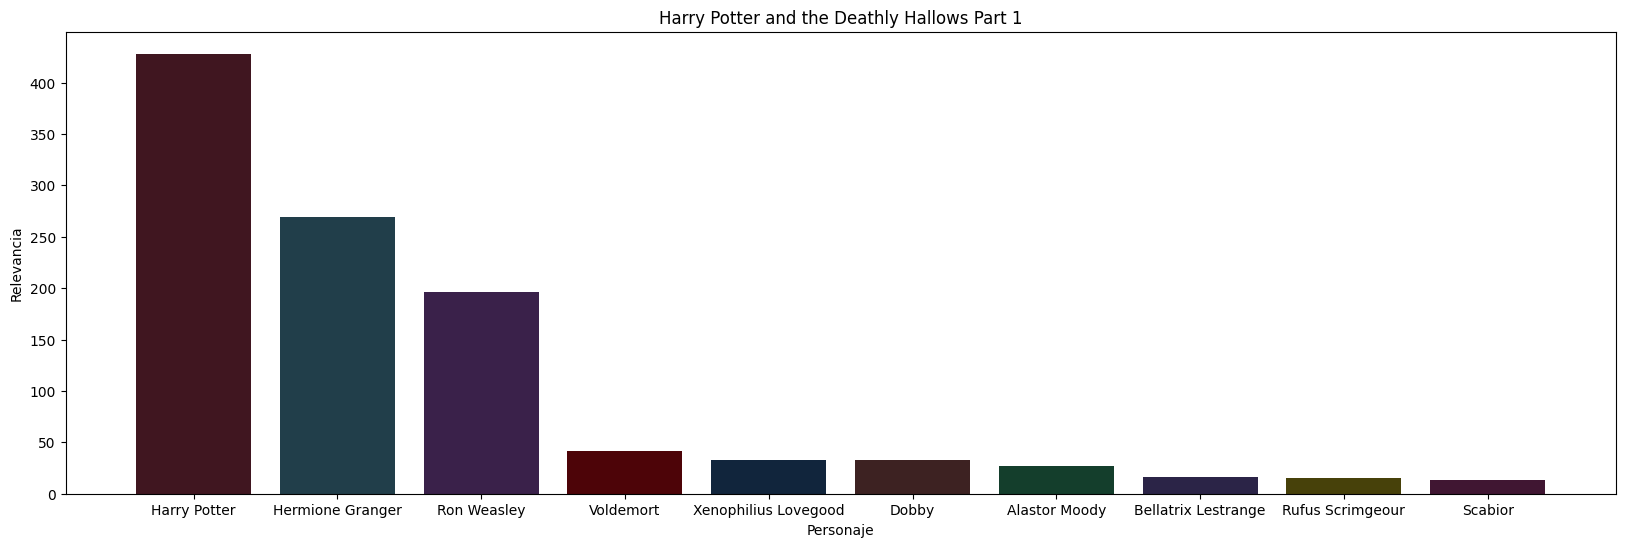

In [29]:
personajes = resultados_personajes['Personaje']
total = resultados_personajes['Total']

colores = ['#401620', '#213E4A', '#3A214A', '#4D0408', '#11253C', '#3D2222', '#143E2C', '#2B2447', '#47410A', '#401632']

plt.figure(figsize=(20, 6))
plt.bar(personajes, total, color=colores)


plt.xlabel('Personaje')
plt.ylabel('Relevancia')
plt.title("Harry Potter and the Deathly Hallows Part 1")

plt.show()

Sacamos cvs para no perder los datos

In [26]:
resultados_personajes.to_csv('csv/Personajes_relevantes/HP_7.csv', index=False)